In [1]:
%matplotlib inline
from IPython import display
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Naive Bayes Classification
- a group of fast and simple algorithms for high dimensional datasets base on <b>Bayes's Theorem</b>
- few tunable parameters
- <b>easy to interpret</b> (and therefore more convincing) because of straight forward probabilistic calculations
- suitable to act as quick <b>baseline model</b>
- usually used for <b>text classification</b>

# Conditonal Probability
The <b>definition</b> of conditional probability is given by
$$P(A|B) = \frac{P(A{\cap}B)}{P(B)}$$

where $P(A|B)$ is the probability of event $A$ given event $B$ has occurred
<br>and $P(A{\cap}B)$ is the probability that both $A$ and $B$ happen

# Bayes's Theorem

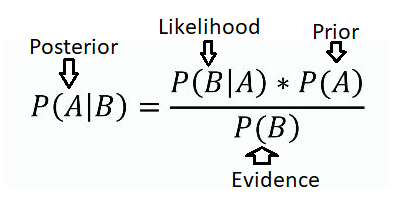

In [2]:
display.Image('img/1_bayes_formula.png', width=300)

- <b>Posterior</b> probability means the probability of a random event <b>after the relevant evidence is taken into account</b>.
- <b>Likelihood</b> probability gives the <b>distribution of data</b> given an event occurs (like the <b>necessary condition</b> for a target to occur), it can be calculated from training data.
- <b>Prior</b> probability is the probabliity of an event <b>without any evidence taken into account</b>, can be taken from past information or experiments.

The formula for calculating the probability of input data being class $C_i$ is given by

$$P(C_i|features) = \frac{P(features|Ci)P(Ci)}{P(features)}$$

where $C_i$ is event that the input data belongs to class $i$

- The above formula can be <b>proved using the definition of conditional probability.</b>

- $P(C_i|features)$ is the probability that the event belongs to class $C_i$ with given features, which is the posterior probability.
- $P(features|C_i)$ is the probability that the input data labelled as class $i$ possessses the features, which is the <b>likelihood</b>.
- $P(C_i)$ is the probabilites of the input data belongs to class $i$, also known as prior probability.

Naive Bayes classifier is a <b>generative</b> model, which estimate the <b>joint probability distribution</b> $P(X, y)$ (which can be used to generate new data instances) of input X and target y to calculate the conditional probability $P(y|X)$. It assumes <b>all features (columns) are independent</b> (naive assumption).

# Gaussian Naive Bayes
- Suitable for datasets with <b>continuous features</b>, e.g. height, cost, etc
- Gaussian assumption: data of each class is drawn from a <b>simple Gaussian (normal) distribution</b>. 
- Mean and variance of feature $X$ of each class is calculated to estimate the likelihood probability $P(X|C_i)$ by the equation of normal distribution.

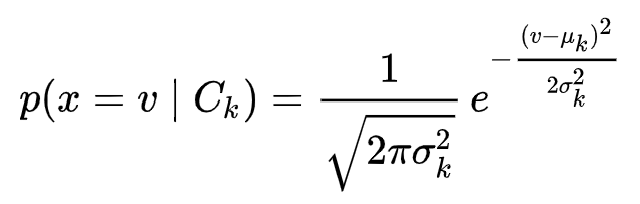

In [3]:
# the gaussian formula to estimate distribution using mean and variance of feature x in each class
display.Image('img/1_gaussian_formula.png', width=300)

where $\mu_k$ and $\sigma_k$ are the mean and sd of features of class $C_k$ respectively.

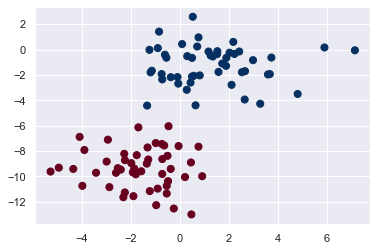

In [4]:
# for example, we randomly generate two classes of data using sklearn make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)    # 100 samples with 2 features, 2 centers to stimulate 2 classes
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

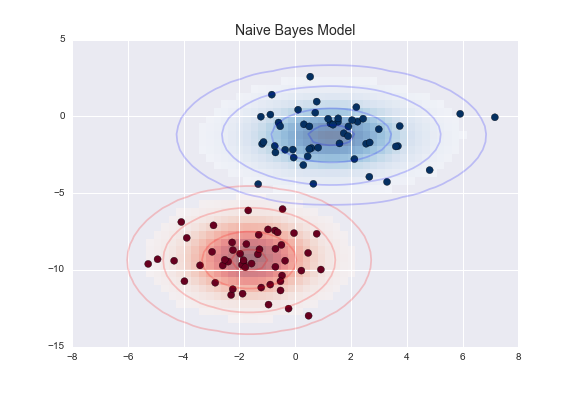

In [5]:
# model idea
# the model estimates the probability P(X|C1) and P(X|C2) of the two classes
# the ellipses show the estimated normal distribution of features in each class
display.Image('img/1_gaussian_naive_bayes.png') 

In [6]:
# use case can be just a few lines of code
# use sklearn GaussianNB model to fit the above data points
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [7]:
# create 2000 new data points for model testing
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)    # data points approximately in a rectangle formed by (-6,-14) and (8,4)
ynew = model.predict(Xnew)

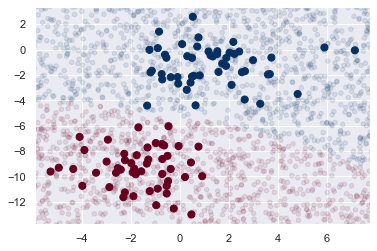

In [8]:
# visualising the approximate boundary of the classifier, which is a quadratic curve
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')    # plot the training data points
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)     # plot new data points with lower opacity
plt.axis(lim);

In [9]:
# if one wants to get the predicted probaility of each class, use predict_proba instead
yprob = model.predict_proba(Xnew)
yprob[:10].round(4)

array([[0.000e+00, 1.000e+00],
       [8.000e-04, 9.992e-01],
       [1.000e-04, 9.999e-01],
       [0.000e+00, 1.000e+00],
       [5.000e-04, 9.995e-01],
       [0.000e+00, 1.000e+00],
       [0.000e+00, 1.000e+00],
       [1.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00],
       [0.000e+00, 1.000e+00]])

# Multinomial Naive Bayes
- It uses <b>multinomial distribution</b> (a generalization of binomial distribution) to estimate likelihood $P(X|C_i)$ instead of gaussian one.
- It can be thought as <b>modeling the probability of result when throwing a k-sided dice for n times</b>.
- It is <b>most appropriate for features that represent counts or count rates</b>.

The posterior probability of each feature $x$ is given by
$$P(x|C_k) \approx \frac{N_{x_k}}{N_x}$$<br>
where $N_{x_k}$ is the number of feature $x$ appears in class $C_k$ and ${N_x}$ is the number of features $x$ appears in the training data 

In [10]:
# use case of multinomial naive bayes
# The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: 
# one for training (or development) and the other one for testing (or for performance evaluation).
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()    # a dictionary containing data, target, target_names
print(data.keys())
data.target_names

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
# restrict to 4 classes training and testing
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(len(train['data']))
print(len(test['data']))

2153
1432


In [12]:
# what a single entry of data looks like
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [13]:
# use tfidf (count rate) for feature engineering
# use MultinomialNB as classifier
# make a pipeline for convenience
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [14]:
# train and test the model
model.fit(train.data, train.target)
labels = model.predict(test.data)

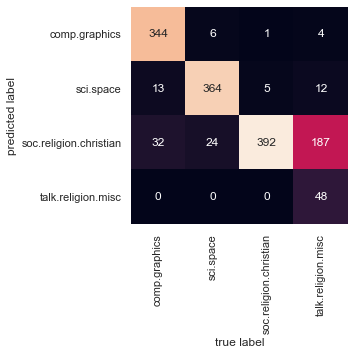

In [15]:
# use confusion matrix to evaluate result
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
# seems not bad, what's the accuracy of the model?
from sklearn.metrics import accuracy_score
accuracy_score(test['target'], labels)

0.8016759776536313

In [17]:
# to deploy the model for future use, write a function to accept a piece of text
def predict_category(s, train=train, model=model):
    pred = model.predict([s])    # give a class in number (0, 1, 2, 3)
    return train.target_names[pred[0]]    # get back target name 
predict_category('sending a payload to the ISS')

'sci.space'

Though the <b>naive assumption usually does not match the reality</b>, this group of models can still <b>perform very well for high dimensional datasets</b>, because data points with high dimensions are usually more well-separated. Thus if there is large amount of high dimensional data theses models can give you very good result.